# Ensemble Methods

import xg bound; visualize different n values

The idea behind ensemble methods is combining multiple ML models, rather than just using one, to improve the accuracy of the results. 


## Boostrappimg

Bootstrapping is a resampling technique that repeatedly draws samples from the dataset (with replacement). 

## Random Forests

Random forests are a popular ML ensemble method used for both regression and classification tasks. Random foresets are built up of multiple decision trees, in which a random subset of training data is selected and a decision tree is trained on it. At each split in the decision tree, random foresets will randomly consider a subset of features to analuze. isThis step is repeated many times unitl you get a forest of decision trees (haha). As with bootstrapping, conclusions about the data are aggreggated from each individual tree and combined using a majority vote to ouut a final prediction.


Random forests are less prone to overfittin, even with complex datasets, due to its randomness and tend to provide a good generalization of performance across different types of datasets. They can handle large ranges of data types and good with noise. Still, random forests can be computationally expensive and require a significant amount of memory, as its utilizing multiple decision trees. 

<IMAGE>


## Boosting

Boosting is another popular ensemble method, but unlike random forests, it builds each of its multiple models sequentially. The idea behind boosting is that for each new iteration, it will slightly correct from the error of  the last. Each new model focuses on the misclassified samples of the previous model.

AdaBoost is one popular boosting algorithm. This algorithm adjusts the weights of each training instance. It assigns higher weights to misclassified datapoints, which forces weak learners to focus more on these samples. This algorithm tends to train faster and is good at handling noisy data and smaller datasets.

Conversely, Gradient Boosting Machines also trains weak learners, ubt it fits each new model iteration to the residual errors of the previous iteration. GBM generally achieves higher predictive performance than AdaBoost and can train on more complex datasets, but it requires more computational effort.

Both versions of boosting rely often on decision trees and have learning rates, although the applications can be a bit different.

## More methods

Stacking is another popular techinique. 

# Application: Random Forests & Boosting

We return to the diabetes dataset to do some further analysis!

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\diabetes_012_health_indicators_BRFSS2015.csv")

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
#X= df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
#y= df.iloc[:,0]


X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


## Application on Random Forests

In [15]:
#Building the Random Forest model
rf = RandomForestRegressor(n_estimators= 50, random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

#k = 5
#cv_results = cross_val_score(rf, X_train, y_train, cv=k, scoring='r2')


## Evaluating the performance

Training errors- MAE:0.16252457545441343, MSE:0.0707192540785445, R2:0.8554522711112468
Testing errors- MAE:0.42473735993487294, MSE:0.4321694973839547, R2:0.10835798963940035


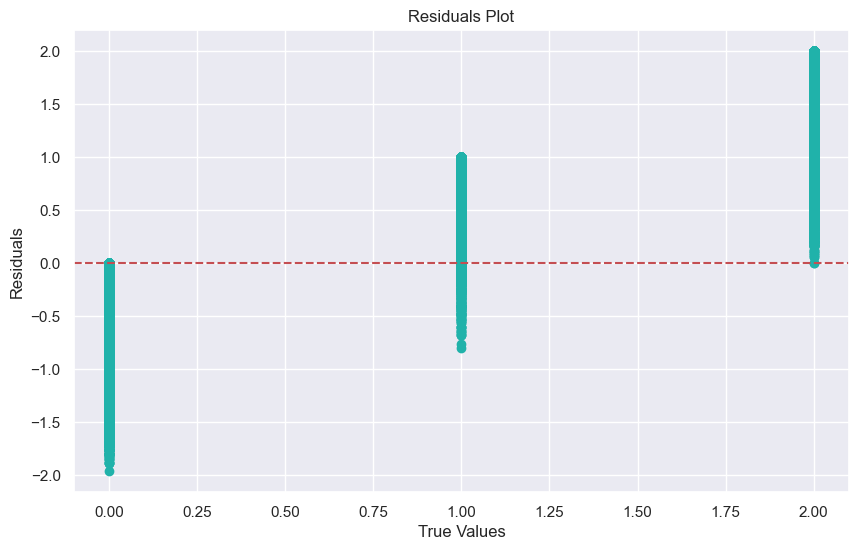

In [29]:
#training error:
mae1 = mean_absolute_error(y_train, y_pred_train)
mse1 = mean_squared_error(y_train, y_pred_train)
r21 = r2_score(y_train, y_pred_train)

#testing error:
mae2 = mean_absolute_error(y_test, y_pred_test)
mse2 = mean_squared_error(y_test, y_pred_test)
r22 = r2_score(y_test, y_pred_test)

print(f"Training errors- MAE:{mae1}, MSE:{mse1}, R2:{r21}")
print(f"Testing errors- MAE:{mae2}, MSE:{mse2}, R2:{r22}")



#Visualization of error analysis 
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color= "lightseagreen")
plt.axhline(y=0, color='r', linestyle='--')

#sns.scatterplot(x=y_test, y=residuals)
#plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()



C:\Users\faith\AppData\Local\Temp\ipykernel_11044\653690305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='viridis')


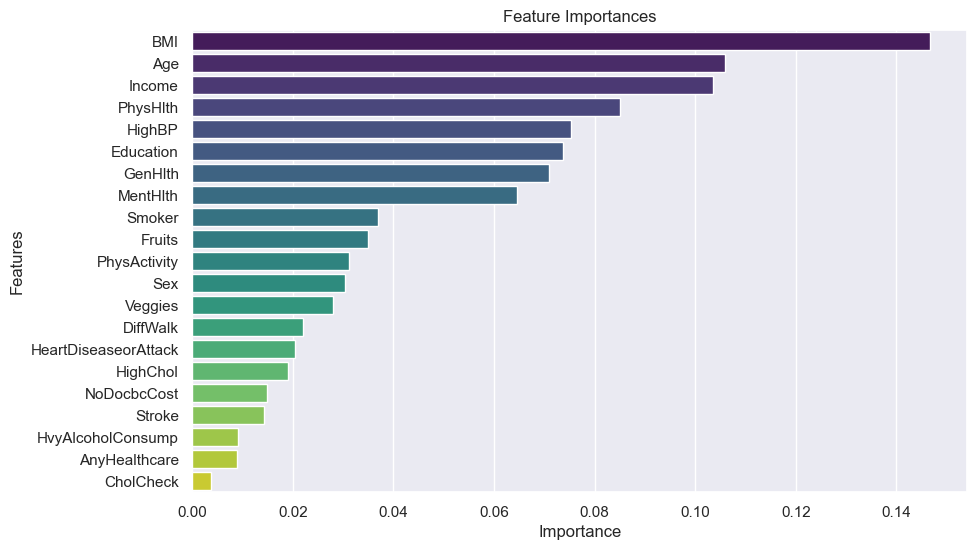

In [21]:
# Feature Importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Application on Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

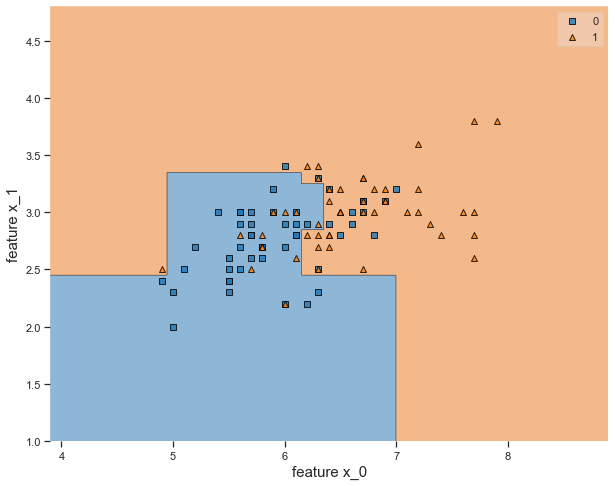

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [4]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.88      0.82      0.85        17

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40
 



---

## Gradient Boosting 
Another popular boosting method is **gradient boosting**. This method works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the *residual errors* made by the previous predictor. Recall the residual error denoted by $error$. 

Given features ```X``` and regression values ```y```, we train a regression tree ```tree_reg1``` on this dat and then ```tree_reg1``` predicts a vector $\hat{y}_1$ of real values. Then, 

$$
y = \hat{y}_1 + error_1
$$

which implies, 
$$
y - \hat{y}_1 = error_1
$$

Next fit another regression tree, say ```tree_reg2```, with features ```X``` and labels $y_2 = y - \hat{y}_1$. Then, ```tree_reg2``` predict a vector $\hat{y}_2$, with 

$$
error_1 = y_2 = \hat{y}_2 + error_2
$$

Thus, 

$$
y = \hat{y}_1 + error_1 = \hat{y}_1 + \hat{y}_2 + error_2, 
$$
where $error_1 > error_2$. This means that we have a better predictor by summing the predictions of ```tree_reg1``` and ```tree_reg2```!


In the following code cells we generate artifical quadratic data and then perform gradient boost with three regression trees. 

---

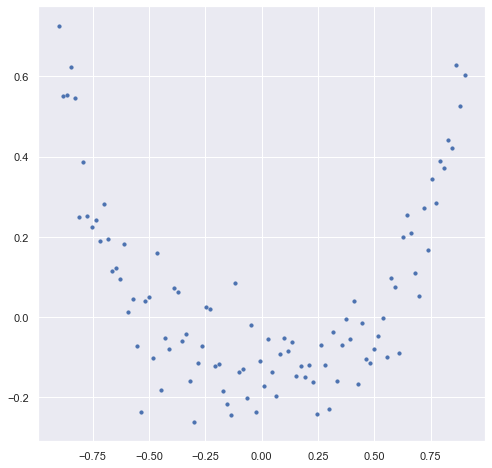

In [5]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = (X ** 4) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# Optional hard coded final prediction
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

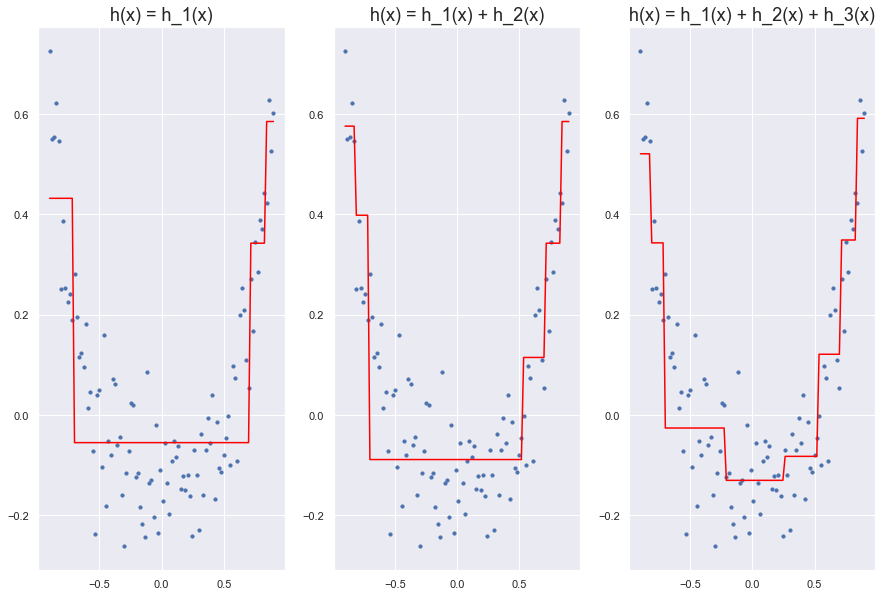

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

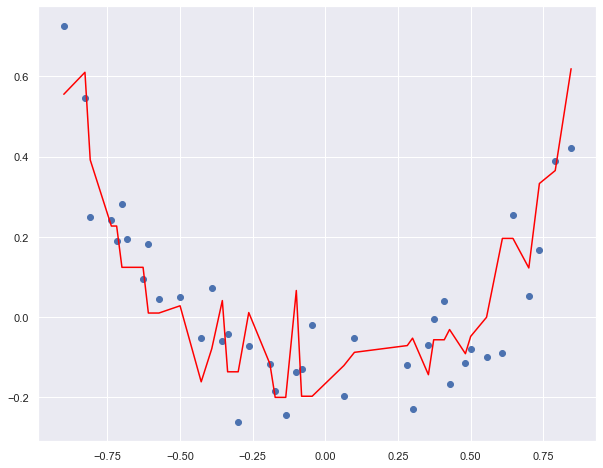

In [9]:

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()